In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_bar, geom_line

In [4]:
data = pd.read_csv("../data_raw/bigmart.csv")

In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.shape

(8523, 12)

In [5]:
data.loc[data['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [28]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

**Separating dependent and independent features**

In [7]:
y = data['Item_Outlet_Sales']
data = data.drop('Item_Outlet_Sales',axis=1)

In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Item_Visibility has min value zero. This doe not make sense as visibilty has to have some value
in order for couromers to look and buy**

**check number of columns with numeric and object data types**

In [9]:
numeric_col = data.select_dtypes(include='number')
categorical_col = data.select_dtypes(exclude='number')
print("Number of numeric column: ", len(numeric_col.columns))
print("Number of categorical column: ", len(categorical_col.columns))

Number of numeric column:  5
Number of categorical column:  7


**Checking missing values in dataset**

In [10]:
missing_percentage = (data.isnull().sum()/data.shape[0]*100).sort_values(ascending=False)
print(missing_percentage)

Outlet_Size                  28.276428
Item_Weight                  17.165317
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


**Need to impute missing values for "Item_Weight" and "Outlet_Size"**

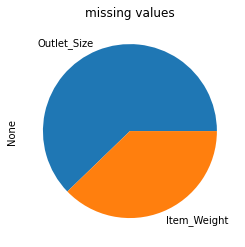

In [11]:
%matplotlib inline
missing_percentage.plot(kind='pie', title='missing values')
plt.show()

**Check number of categorical values for each categorical feature**

In [12]:
print("Number of categories for each categorical feature: \n")
print(data.select_dtypes(exclude='number').nunique())

Number of categories for each categorical feature: 

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64


**Item_Identifier has many categorical values so we need to apply some feature engg technique to reduce number of categorical values.**

In [20]:
categorical_columns = (data.select_dtypes(exclude='number').columns).tolist()
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [14]:
data[categorical_columns]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [15]:
for col in categorical_columns:
    if col not in ['Item_Identifier','Outlet_Identifier']:
        print("\n Column: ", col)
        print("\n")
        print(data[col].value_counts())


 Column:  Item_Fat_Content


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

 Column:  Item_Type


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

 Column:  Outlet_Size


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

 Column:  Outlet_Location_Type


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

 Column:  Outlet_Type


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3    

**Item_Fat_Content has irregularities in its values we can modify it accordingly**

In [16]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

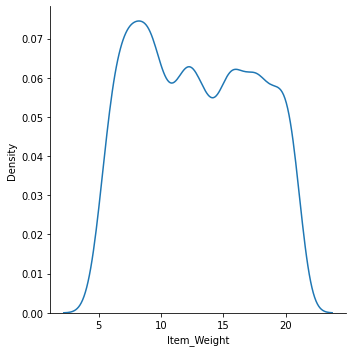

In [17]:
sns.displot(data['Item_Weight'],kind='kde',legend=True)
plt.show()

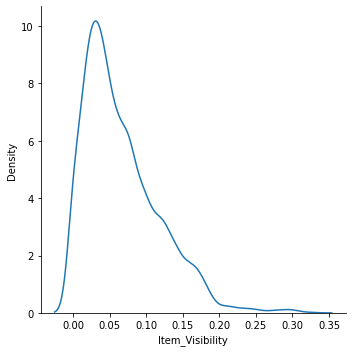

In [18]:
sns.displot(data['Item_Visibility'],kind='kde',legend=True)
plt.show()

**Item_Visibility looks like the data distributed is right skewed. We can replace 0 value with median**

**Analysing mart sales per outlet**

In [19]:
outlet_grp = data.groupby('Outlet_Identifier')

In [20]:
outlet_grp[['Item_Outlet_Sales']].describe()

Item_Outlet_Sales                                      \
                              count         mean          std       min   
Outlet_Identifier                                                         
OUT010                        555.0   339.351662   271.014855   33.2900   
OUT013                        932.0  2298.995256  1533.531664   73.2380   
OUT017                        926.0  2340.675263  1550.778025  143.8128   
OUT018                        928.0  1995.498739  1375.932889   69.2432   
OUT019                        528.0   340.329723   249.979449   33.9558   
OUT027                        935.0  3694.038558  2127.760054  241.6854   
OUT035                        930.0  2438.841866  1538.512533  113.8518   
OUT045                        929.0  2192.384798  1462.399658   99.8700   
OUT046                        930.0  2277.844267  1488.405631  101.8674   
OUT049                        930.0  2348.354635  1513.289464  111.8544   

                                                                  
                          25%        50%         75%         max  
Outlet_Identifier                                                 
OUT010              154.13270   250.3408   455.40720   1775.6886  
OUT013             1072.60380  2050.6640  3166.37835  10256.6490  
OUT017             1195.94325  2005.0567  3096.46935   9664.7528  
OUT018              981.55565  1655.1788  2702.64865   6768.5228  
OUT019              153.63335   265.3213   460.73360   1482.0708  
OUT027             2044.33890  3364.9532  4975.52340  13086.9648  
OUT035             1238.88735  2109.2544  3310.35760   8479.6288  
OUT045             1068.60900  1834.9448  2929.52000   8994.9580  
OUT046             1137.18640  1945.8005  3095.63710   9779.9362  
OUT049             1182.79370  1966.1074  3281.72820   7646.0472

**The above fixtures show outlet wise data which can be used to study outlet performance**

In [21]:
outlet_grp['Item_Outlet_Sales']

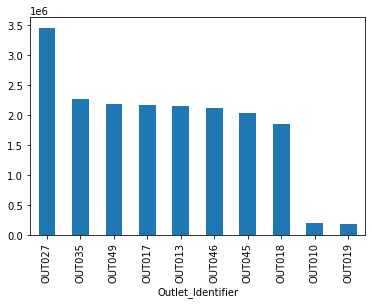

In [22]:
round(outlet_grp['Item_Outlet_Sales'].sum().sort_values(ascending=False),2).plot(kind='bar')
plt.show()

In [23]:
data.pivot_table(values='Item_Outlet_Sales',index=['Outlet_Location_Type','Outlet_Identifier'], aggfunc=np.sum).\
    sort_values(by='Item_Outlet_Sales',ascending=False).style.format('₹{0:,.2f}')

**Looks like out027 of tier 3 has highest sale value**

**Tier 3 location has 4 outlets. This could be assumed as metro cities where usually the sales and outlets are higher**

** **

**Checking sales for each outlet type**

<AxesSubplot:ylabel='Outlet_Type'>

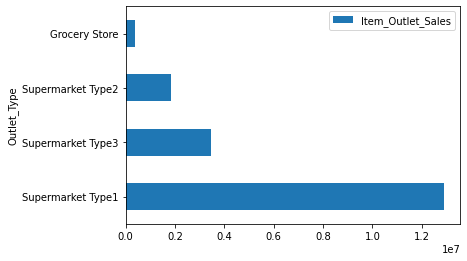

In [24]:
data.pivot_table(values='Item_Outlet_Sales',index=['Outlet_Type'], aggfunc=np.sum).\
    sort_values(by='Item_Outlet_Sales',ascending=False).plot(kind='barh')

**Chicking sales for each outlet location** 

<AxesSubplot:xlabel='Outlet_Location_Type'>

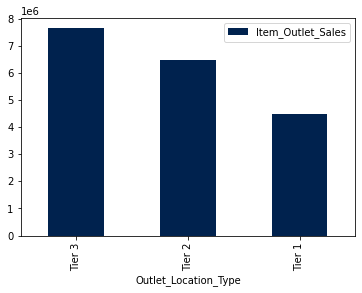

In [25]:
data.pivot_table(values='Item_Outlet_Sales',index=['Outlet_Location_Type'], aggfunc=np.sum)\
    .sort_values(by='Item_Outlet_Sales',ascending=False).plot(kind='bar', colormap='cividis')

* ___In tier3 number of item outlet sales is more___

**Sales for each item type**

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

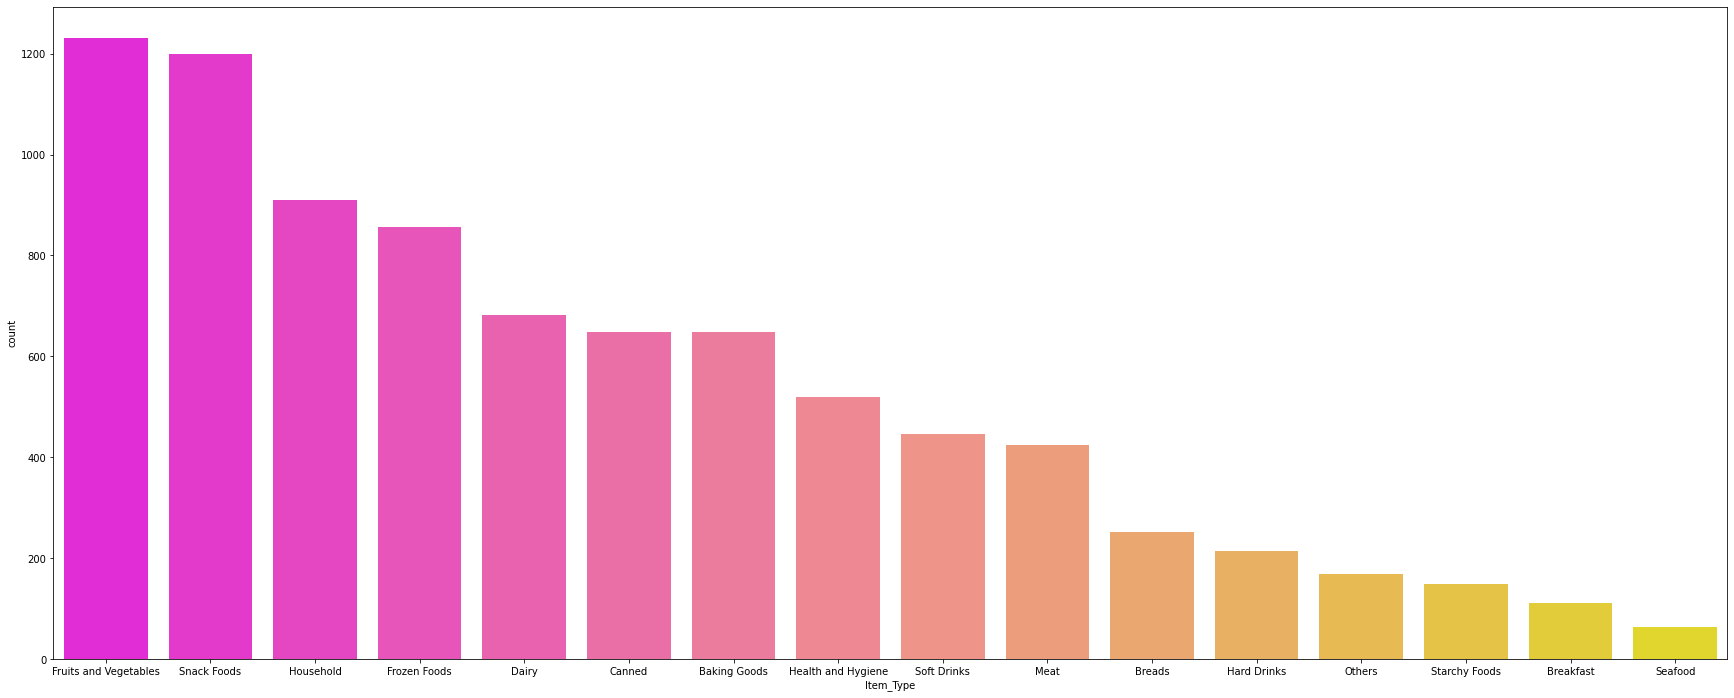

In [26]:
plt.figure(figsize=(30,12))
sns.countplot(x='Item_Type',data=data,order=data['Item_Type'].value_counts().index,
              palette='spring')

* ___Fruits & vegetables, snack foods are most sold items___

In [27]:
data.pivot_table(values='Item_Outlet_Sales',index=['Item_Type'], aggfunc=np.sum)\
    .sort_values(by='Item_Outlet_Sales',ascending=False).style.format('₹{0:,.2f}')

,Item_Outlet_Sales
Item_Type,
Fruits and Vegetables,"₹2,820,059.82"
Snack Foods,"₹2,732,786.09"
Household,"₹2,055,493.71"
Frozen Foods,"₹1,825,734.79"
Dairy,"₹1,522,594.05"
Canned,"₹1,444,151.49"
Baking Goods,"₹1,265,525.34"
Health and Hygiene,"₹1,045,200.14"
Meat,"₹917,565.61"


**Fruits and Vegetables has the highest sales. We can assume that customers like fresh fruits and veg from mart.**

** **

**Distribution**

In [28]:
from scipy import stats

def diagnostic_plots(data, col):
    
    plt.figure(figsize=(6,4))
    plt.subplot(1,1,1)
    stats.probplot(data[col], dist='norm',plot=plt)
    plt.ylabel('Q-Q plot')
    
    plt.subplot(1,1,1)
    sns.displot(data[col], kind='kde')
    plt.title('kde')
    plt.show()

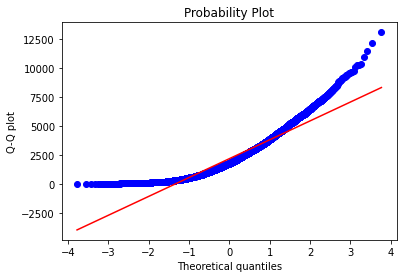

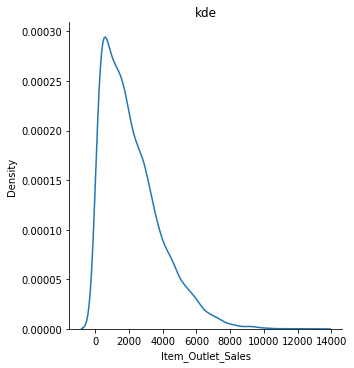

In [29]:
diagnostic_plots(data, 'Item_Outlet_Sales')

* The target is right skewed
* Distribution is deviating from normal distribution at the far ends.

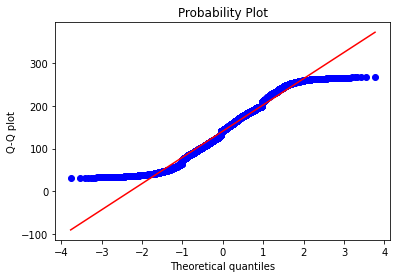

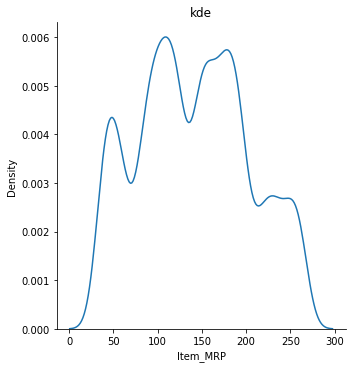

In [30]:
# sns.displot(data['Item_MRP'], kind='kde')
diagnostic_plots(data, 'Item_MRP')

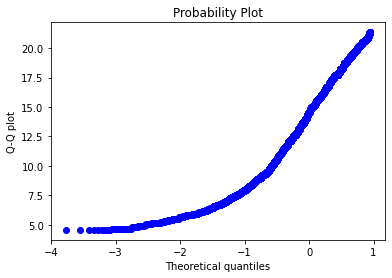

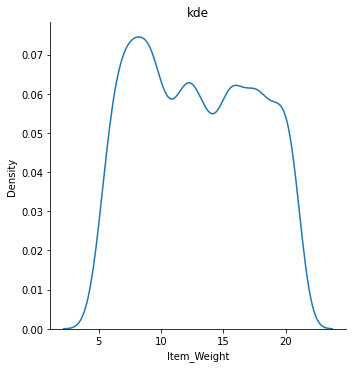

In [31]:
diagnostic_plots(data, 'Item_Weight')

In [32]:
print("Kurtosis of target: ",data['Item_Outlet_Sales'].kurt())
print("Skewness of target: ",data['Item_Outlet_Sales'].skew())

Kurtosis of target:  1.6158766814287264
Skewness of target:  1.1775306028542796


**Correlation between numerical values**

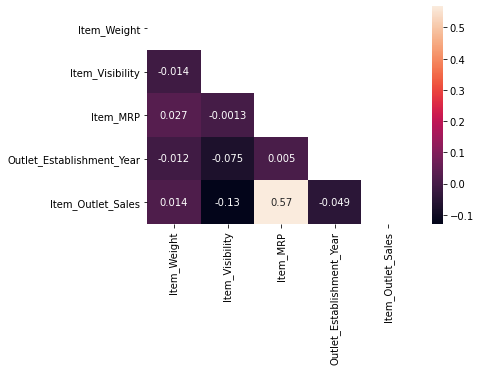

In [33]:
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True, mask=matrix)
plt.show()

* 1 to 0.7 - Very strong correlation
* 0.7 to 0.5 - strong correlation
* 0.5 to 0.3 - mild correlation
* <0.3 - Low correlation

* Item MRP has mild correlation with item outlet sales 
* All the features have low correlations

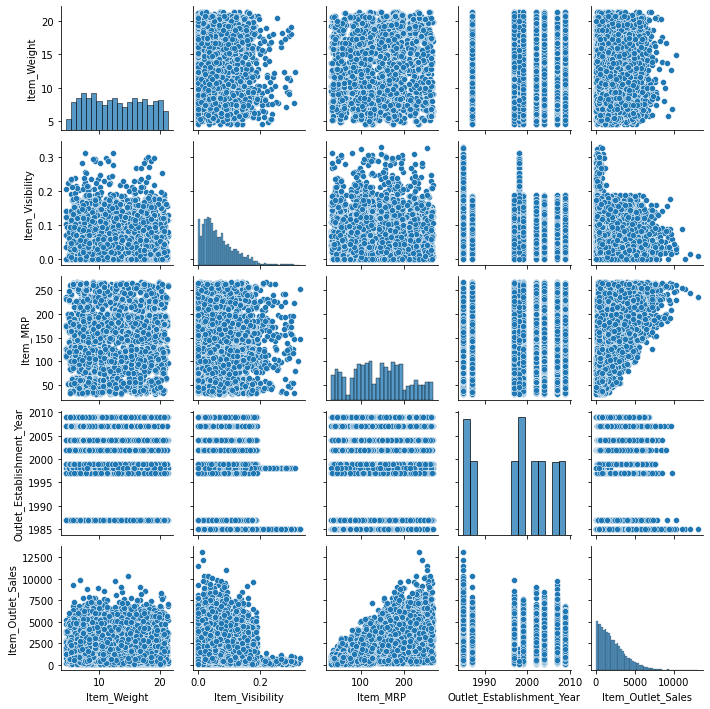

In [34]:
sns.pairplot(data, height=2)
plt.show()

**Outlier detection**

In [35]:
from sklearn.preprocessing import StandardScaler
sales_scaled = StandardScaler().fit_transform(data['Item_Outlet_Sales'][:,np.newaxis])
lowrange = sales_scaled[sales_scaled[:,0].argsort()][:10]
highrange = sales_scaled[sales_scaled[:,0].argsort()][-10:]
print("Top 10 Lower range of distribution: ")
print(lowrange)
print("\nTop 10 Higher range of distribution: ")
print(highrange)

Top 10 Lower range of distribution: 
[[-1.25879017]
 [-1.25879017]
 [-1.25839999]
 [-1.25800981]
 [-1.25761963]
 [-1.25683928]
 [-1.25683928]
 [-1.2564491 ]
 [-1.25605892]
 [-1.25605892]]

Top 10 Higher range of distribution: 
[[4.39333221]
 [4.45302948]
 [4.62470792]
 [4.72069177]
 [4.73239712]
 [4.76166049]
 [5.16432446]
 [5.42886533]
 [5.82294538]
 [6.39104493]]


<ipython-input-35-fd05cbc4a5fd>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


* Lower range values are near to zero wich is fine
* Higher range values are away from 0 (mean). We may have to examine them whether they are genuine or noisy points

<AxesSubplot:>

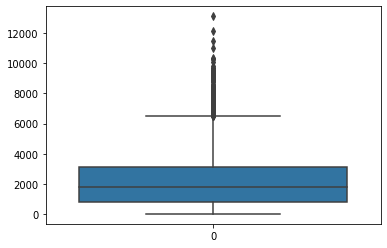

In [36]:
sns.boxplot(data=data['Item_Outlet_Sales'])

**It looks like there are quite a number of outliers. We can check this with a feature which has high correlation with outlet sales**

**We will check with highly correlated variables**

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

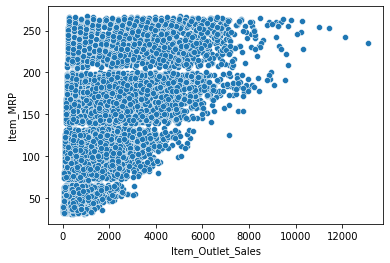

In [37]:
sns.scatterplot(x=data['Item_Outlet_Sales'], y=data['Item_MRP'])

**According to above plot few points are above 10k sales. This should be ok as there is possibility of sales. If the sales were more than 100k or something then we would had to treat them.**

     Things to do
* log transform on target/MRP
* impute missing vals 
* Item ID reduce number of categories
* Take care of Item fat content
* check homoscedasticity after log transform

In [38]:
def impute_miss_values(df, col, method):
    df[col] = df[col].fillna(method)

In [39]:
impute_miss_values(data, "Item_Weight", "mean")

In [40]:
data["Item_Weight"].isnull().sum()

0

In [41]:
# df[col].fillna(method)
data["Outlet_Size"].fillna('ultra_high', inplace=True)

In [42]:
import re
def clean_data(data):
    all_cat_col = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
    print("all_cat_colall_cat_col",all_cat_col)
    for col in all_cat_col:
        print(col)
#         print(data[col])
        data[col] = data[col].str.lower().replace(' ', '_')

In [43]:
def find_and_replace(df, col, rep_lst):
    df[col] = df[col].str[:2]

In [44]:
find_and_replace(data, "Item_Identifier", ["Food", "Essentials", "Drinks"])

In [45]:
data["Item_Identifier"] = data["Item_Identifier"].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})

In [46]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

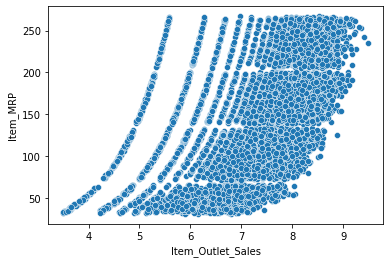

In [47]:
# np.log(data['Item_Outlet_Sales']).plot(kind='kde')
sns.scatterplot(x=np.log(data['Item_Outlet_Sales']), y=data['Item_MRP'])

In [48]:
data.pivot_table(values='Item_Visibility', index='Item_Identifier')

,Item_Visibility
Item_Identifier,
Drinks,0.063099
Food,0.068332
Non-Consumable,0.059222


In [49]:
monthly_expenses = [2230, 2250, 2600, 1300, 5260]

In [50]:
monthly_expenses[1]-monthly_expenses[0]

20

In [52]:
monthly_expenses[0]+monthly_expenses[1]+monthly_expenses[2]

7080

In [53]:
monthly_expenses[0] == 2000

False

In [57]:
monthly_expenses.append(1900)
monthly_expenses

[2230, 2250, 2600, 1300, 5260, 1900, 1900]

In [58]:
monthly_expenses[3]-=200

In [60]:
monthly_expenses

[2230, 2250, 2600, 1100, 5260, 1900, 1900]

In [61]:
heros=['spider man','thor','hulk','iron man','captain america']

In [63]:
len(heros)

5

In [64]:
heros.append('black panther')

In [75]:
heros

['black panther',
 'captain america',
 'doctor stragne',
 'iron man',
 'spider man']

In [66]:
heros.pop(5)

'black panther'

In [69]:
heros.insert(3, 'black panther')

In [71]:
heros[1:3] = ['doctor stragne']

In [74]:
heros.sort()

In [80]:
max_no = int(input("Enter max number"))

odd_list = []
for i in range(1, max_no+1):
    if i%2 != 0:
        odd_list.append(i)
odd_list

Enter max number9


[1, 3, 5, 7, 9]

In [92]:
odd_comp = [i for i in range(1, max_no+1) if i%2!=0]

In [93]:
odd_comp

[1, 3, 5, 7, 9]